# Анализ ранка видео игр

# Цель:
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Аббревиатуры:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Оглавление:

[Шаг 1: Файл с данными](#one)

[Шаг 2: Подготовка данных](#two)

[Шаг 3: Исследовательский анализ данных](#three)

[Шаг 4: Портрет пользователя каждого региона](#four)

[Шаг 5: Проверка гипотез](#five)

[Общий вывод](#one)


<a id= 'one'></a>
# Шаг 1 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy import stats as st
warnings.filterwarnings('ignore')


In [2]:
gdata = pd.read_csv("/datasets/games.csv")
display(gdata.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
display(gdata.info())
display(gdata.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Вывод: Шаг 1
Просмотря таблицу, можно сразу увидеть, что некоторые данные отсутсвуют. Так же сразу видно, что есть проблема со столбцом годом выпуска, а так же в столбце "User_Score" очень низкие рейтинги при условии, что 100 это максимум, тут как видимо тоже ошибка.

<a id= 'two'></a>
# Шаг 2

In [4]:
#Привести название столбцов к нижнему регистру
gdata.columns = gdata.columns.str.lower()

In [5]:
#Преобразовать данные в нужные типы.
gdata.info()
gdata["year_of_release"] = gdata["year_of_release"].astype("Int64")

gdata["user_score"] =pd.to_numeric(gdata["user_score"] , errors = "coerce")
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non

По поводу дат в самом наназвании игры, я так думал сделать, но не решился так как эта дата не совсем корректна. Например, есть игра под названием LMA Manager 2007, но дата выпуска у него 2006, а есть игры где совпадают. В общем, это может занять много время, а данные я получу не совсем коректные, так что я решил не тратить время на это.

Я заменил столбец год выпуска на int, таким образом смогу использовать в дальнейшем в анализе данных. Так же заменил столбец "user_name", на тип float, но появилось большое количество пропусков, но без этого я не смогу проанализировать данные.

In [6]:
#Обработать пропуски
row = gdata.columns
for row in gdata:
    print(row,gdata[row].isnull().sum())


name 2
platform 0
year_of_release 269
genre 2
na_sales 0
eu_sales 0
jp_sales 0
other_sales 0
critic_score 8578
user_score 9125
rating 6766


In [7]:
row = gdata.columns
for row in gdata:
    print(row,gdata[row].unique())

name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
platform ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
year_of_release <IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000,  NaN, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64
genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
na_sales [4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 

In [8]:
gdata["user_score"] = gdata["user_score"] * 10

In [9]:
#Заполняю пропущенные годы выпуска
a = gdata.groupby('name')['year_of_release'].agg(['median','mean'])
a['diff'] = a['median'] - a['mean']
notworking = a.loc[a['diff'] == 0, 'median'].to_dict()
 
def year(row):
    if pd.isna(row['year_of_release']):
        return notworking.get(row['name'])
    return row['year_of_release']
 
 
gdata['year_of_release'] = gdata.apply(year, axis=1)
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16563 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [10]:
#Заполняю пропущенный рейтинг 
 
name_score = gdata[['name','rating']]
name_score = name_score.drop_duplicates().dropna().reset_index(drop=True)
 
def rating_fill(row):
    if pd.isna(row['rating']):
        filler = name_score.loc[name_score['name'] == row['name'], 'rating']
        if len(filler) > 0:
            return name_score.loc[name_score['name'] == row['name'], 'rating'].values[0]
    return row['rating']
 
 
gdata['rating'] = gdata.apply(rating_fill, axis=1)
print(gdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16563 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             10386 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


Я максимально попытался заполнить пропуски, но даже после интегрирования функций не получается все заполнить, я решил, что не буду далее пытаться заполнить пропуски в столбцах, где я уже это сделал, так как считаю, что это может исказить данные. Так же, я не пытался заполнить пропуски, там, где рейтинг критиков и пользователей. Все, потому что даже если я буду вычислять через среднее или медианы, как я делал с другими столбцами, все равно это будет пальцем в небо, так как привязать к году или жанру нельзя и неправильно, все, потому что это может повлиять, например на средний рейтинг жанра. Сейчас объясню как, например так получилось, что в жанре экшен много пропусков в рейтинге, но есть пару игр с хорошими оценками, таким образом если я заполню или средним значением или даже медианной, то все равно получится так, что все игры этого жанра буду с хорошими рейтингами, что уже настораживает, или наоборот. 

По поводу появление пропусков, в этом сыграло роль tbh с английского это аббревиатура для "подлежит определению", другими словами, при выгрузке данных еще не было известно рейтинга для некоторых игр, тут два варианта или игра очень свежая и еще не успели достаточно людей поставить оценку, или игра была на столько не популярной, что просто никто не ставил ей оценки. Когда я заменял тип данных в столбце "user_score", то все tbd превратились в nan, что в принципе одно и тоже.


In [11]:
#Посчитать суммарные продажи во всех регионах

gdata["sum_rev"] = gdata["na_sales"] + gdata["eu_sales"] + gdata["jp_sales"] + gdata["other_sales"]
gdata.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_rev
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<a id= 'three'></a>
# Шаг 3

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     339
2000.0     350
2001.0     484
2002.0     845
2003.0     784
2004.0     764
2005.0     947
2006.0    1019
2007.0    1202
2008.0    1440
2009.0    1430
2010.0    1269
2011.0    1153
2012.0     662
2013.0     547
2014.0     582
2015.0     606
2016.0     502
Name: name, dtype: int64

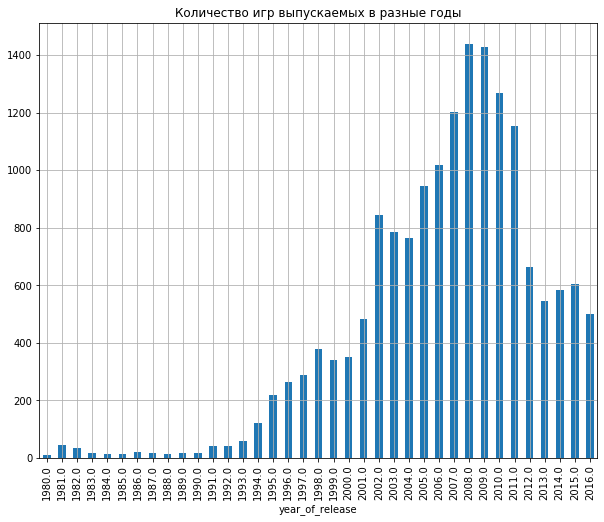

In [12]:
#Сколько игр выпускалось в разные годы?
#gdata["year"] = pd.to_datetime(gdata["year_of_release"], format = "%Y")
gdata["year_of_release"] = gdata["year_of_release"].round()
games_per_year  = gdata.groupby("year_of_release")["name"].count()
display(games_per_year)
games_per_year.plot(x = "year_of_release", y = "name", kind = "bar", title = "Количество игр выпускаемых в разные годы", figsize = (10, 8), grid = True )


Изучение всего периода думаю не обязательно, можно взять только промежуток с 1994 по 2016. Аквтиный рост и падение произошли в этот период.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sum_rev, dtype: float64

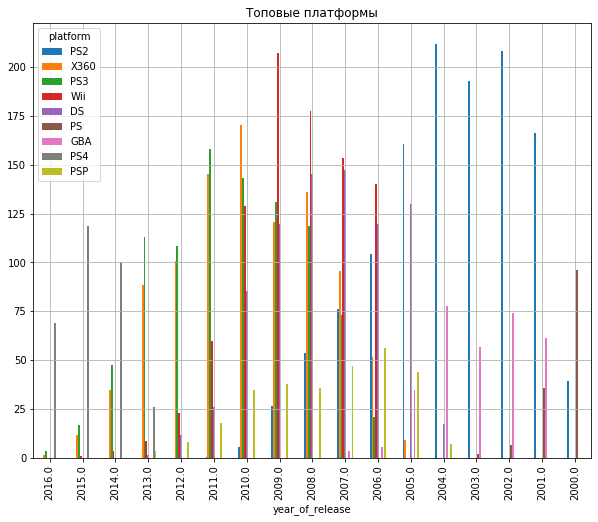

In [13]:
#Изменение продаж по платформам
plat_rev = gdata.groupby("platform")["sum_rev"].sum()
sort_plat_rev = plat_rev.sort_values( ascending = False)
display(sort_plat_rev.head(10))
data_plat = gdata.pivot_table(index= "year_of_release", columns = "platform", values ="sum_rev", aggfunc = "sum").sort_values(by = "year_of_release", ascending = False)
#top_data_plat = data_plat.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS"')
top_data_plat = data_plat[["PS2", "X360", "PS3" , "Wii" , "DS", "PS", "GBA", "PS4", "PSP"]]
top_data_plat_1 = top_data_plat.query('year_of_release > 1999')
top_data_plat_1.plot( kind = "bar", title = "Топовые платформы", figsize = (10, 8), grid = True)
plt.show()

Полный цикл консоли от выпуска до никому ненужности состовляет примерно 10 лет.

In [14]:
#Актуальный период
period = gdata.query('year_of_release > 2010')
top_period = top_data_plat_1.query('year_of_release > 2010')
top_period

platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP
year_of_release,,,,,,,,,
2016.0,NaN,1.52,3.60,0.18,NaN,NaN,NaN,69.25,NaN
2015.0,NaN,11.96,16.82,1.14,NaN,NaN,NaN,118.90,0.12
2014.0,NaN,34.74,47.76,3.75,NaN,NaN,NaN,100.00,0.24
2013.0,NaN,88.58,113.25,8.59,1.54,NaN,NaN,25.99,3.38
2012.0,NaN,100.72,108.28,22.94,11.67,NaN,NaN,NaN,7.95
2011.0,0.45,145.23,157.98,59.79,26.33,NaN,NaN,NaN,17.82


Что бы найти актуальный период, на следующие хотя бы лет 10, значит нужно взять с 2010 года.

In [15]:
#Самые топовые консоли
top_cons_all = gdata.query('platform == "PS4" or platform == "X360" or platform == "PS3"')
top_cons_rev = top_period[["PS4", "X360", "PS3"]]
top_cons_rev

platform,PS4,X360,PS3
year_of_release,,,
2016.0,69.25,1.52,3.60
2015.0,118.90,11.96,16.82
2014.0,100.00,34.74,47.76
2013.0,25.99,88.58,113.25
2012.0,NaN,100.72,108.28
2011.0,NaN,145.23,157.98


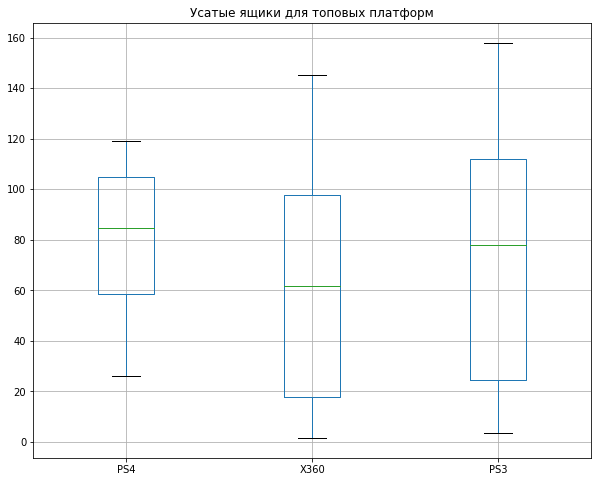

In [16]:
#Построить ящик с усами
top_cons_rev.plot( kind = "box", figsize = (10, 8), title = ("Усатые ящики для топовых платформ"), grid = True, )

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
По графикам видно, что медиана по сумме продаж за год у PS4 выше, чем у других. Но так же хорошо видно, что платформы x360 и PS3, в свои лучшие годы зарабытывали намного больше чем PS4.
</div>

<div class="alert alert-block alert-warning">
<b>Remarks:</b> Хорошо, что ты умеешь использовать боксплоты, но сейчас они абсолютно немы для читателя. Нужно добавить заголовок, подписать оси и какой-то вывод по ним

0.2851512672524174

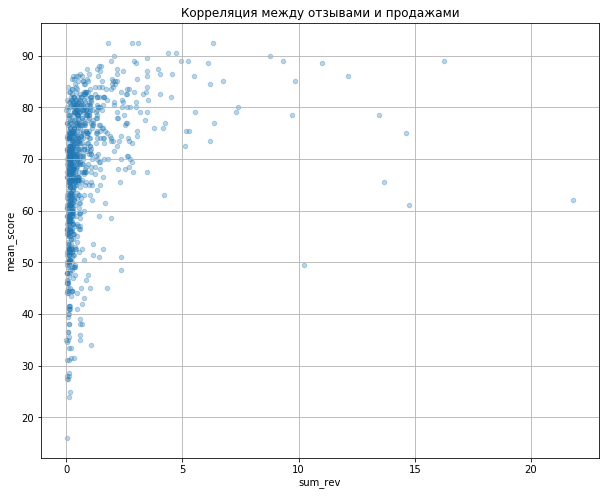

In [17]:
#Влияния отзывов на продажи
x360 = top_cons_all.query(' platform == "X360"')
x360["mean_score"] = (x360["user_score"] + x360["critic_score"])/2
x360.plot(x = "sum_rev", y = "mean_score", kind = "scatter", alpha = 0.3, grid = True, figsize= (10, 8), title= "Корреляция между отзывами и продажами")
display(x360["mean_score"].corr(x360["sum_rev"]))

Можно увидеть, что корреляция существует но не сильная, и это видно даже по графику. Хорошо видно,что некоторые игры даже с низким рейтингом, все равно получали хорошие сборы. Самая успешная игра, имеет средние отзывы. Однако, чем выше рейтинг, тем больше коммерчески успешных игр.

Корреляция для PS3: 0.3167871259858517
Корреляция для PS4: 0.19233840669826302


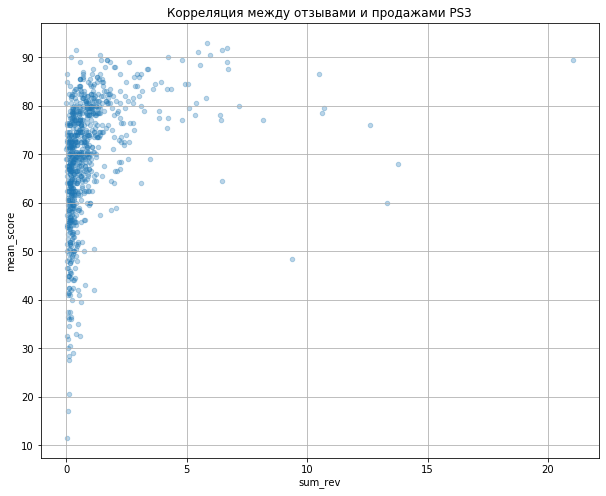

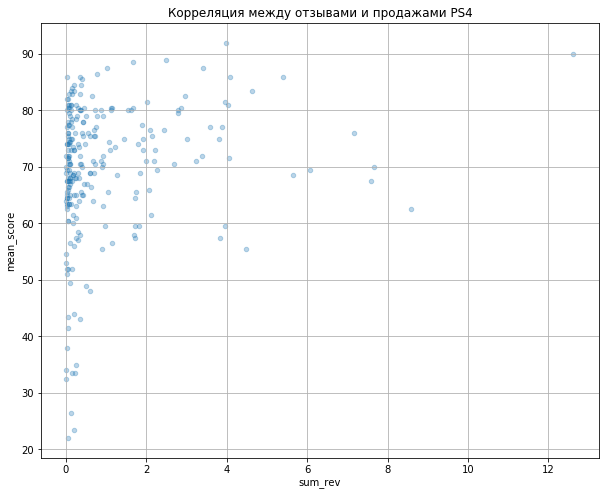

In [18]:
#Для других платформ njgjds[ gkfnajhv]
ps3 = top_cons_all.query(' platform == "PS3"')
ps3["mean_score"] = (ps3["user_score"] + ps3["critic_score"])/2
ps3.plot(x = "sum_rev", y = "mean_score", kind = "scatter", alpha = 0.3, grid = True, figsize= (10, 8), title= "Корреляция между отзывами и продажами PS3")
print('Корреляция для PS3:', ps3["mean_score"].corr(ps3["sum_rev"]))

ps4 = top_cons_all.query(' platform == "PS4"')
ps4["mean_score"] = (ps4["user_score"] + ps4["critic_score"])/2
ps4.plot(x = "sum_rev", y = "mean_score", kind = "scatter", alpha = 0.3, grid = True, figsize= (10, 8), title= "Корреляция между отзывами и продажами PS4")
print('Корреляция для PS4:', ps4["mean_score"].corr(ps4["sum_rev"]))

Проанализировав так же и другие консоли, можно увидеть, что корреляция не большая но присутсвует. Интересно другое, что со временем корреляция падает, и это хорошо видно, в PS4, что продажам уже практически все равно на оценку.

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: sum_rev, dtype: float64


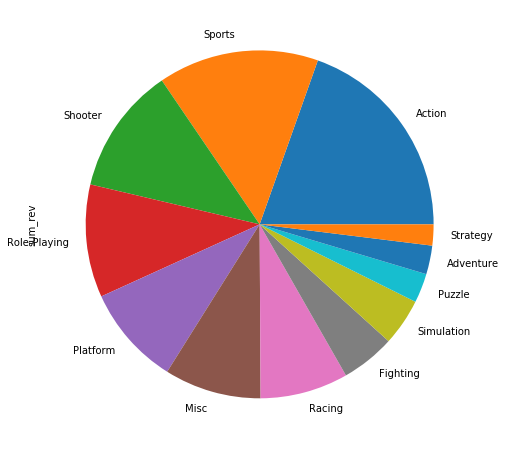

In [19]:
#Общее распределение игр по жанрам
genre_sort = gdata.groupby("genre")["sum_rev"].sum().sort_values(ascending = False)
print(genre_sort)
genre_sort.plot(kind = "pie", figsize= (10, 8))

В таблице хорошо видно, что разрыв между самыми прибыльными и неудачными жанрами, разница примерно в 10 раз.

<a id= 'four'></a>
# Шаг 4

Самые популярные платформы в северной Америке:
          na_sales
platform          
X360        228.18
PS3         168.96
PS4         108.74
XOne         93.12
3DS          82.83

Самые популярные платформы в Европе:
          eu_sales
platform          
PS3         164.15
PS4         141.09
X360        117.87
3DS          61.46
PC           57.38

Самые популярные платформы в Японии:
          jp_sales
platform          
3DS         100.62
PS3          49.40
PSP          24.28
PSV          21.84
PS4          15.96


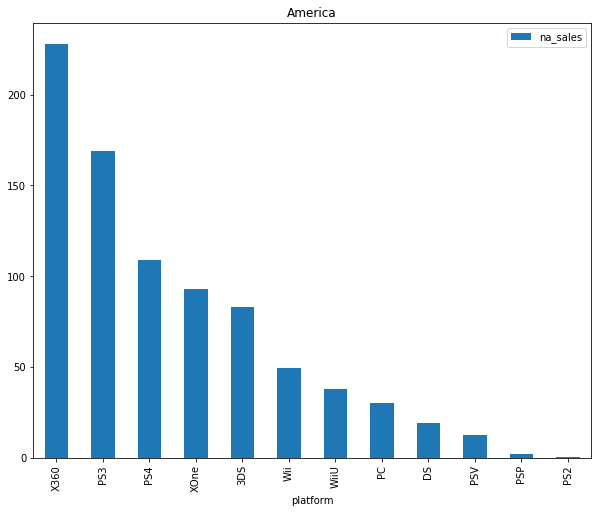

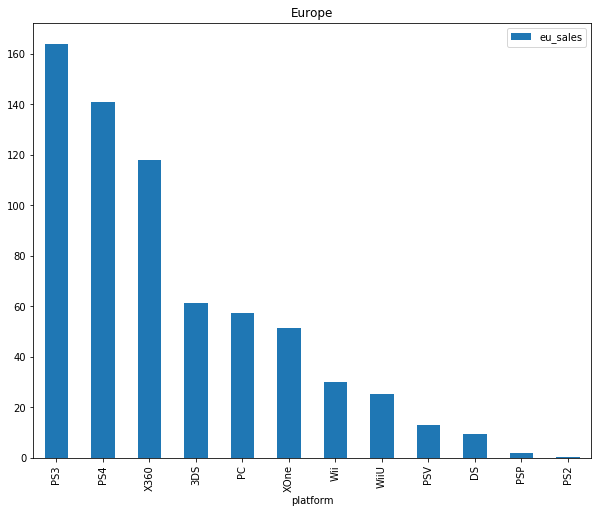

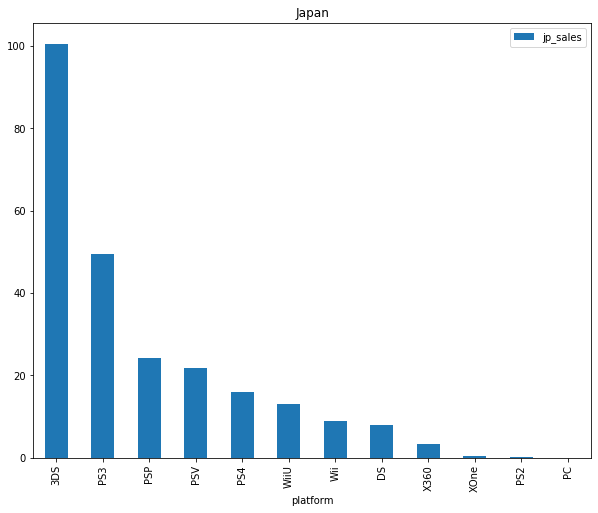

In [20]:
#Самые популярные платформы
na = period.pivot_table(index = "platform", values = "na_sales", aggfunc = "sum").sort_values(by = "na_sales", ascending = False)
print("Самые популярные платформы в северной Америке:")
print(na.head())
na.plot(y= "na_sales", kind = "bar", figsize= (10, 8), title = "America")
print()
eu = period.pivot_table(index = "platform", values = "eu_sales", aggfunc = "sum").sort_values(by = "eu_sales", ascending = False)
print("Самые популярные платформы в Европе:")
print(eu.head())
eu.plot(y = "eu_sales", kind = "bar", figsize= (10, 8), title = "Europe")
print()
jp = period.pivot_table(index = "platform", values = "jp_sales", aggfunc = "sum").sort_values(by = "jp_sales", ascending = False)
print("Самые популярные платформы в Японии:")
print(jp.head())
jp.plot(y = "jp_sales", kind = "bar", figsize= (10, 8), title = "Japan")


Можно увидеть, что зависимости от региона меняются предпочтение в консолях. В европе и в америке, предпочтение очень похожие, но в японии все очень подругому, там доминирует приставка 3DS, которая совсем не популярна в европе и в америке.

Самые популярные жанры в северной Америке:
              na_sales
genre                 
Action          234.41
Shooter         194.45
Sports          108.70
Role-Playing     83.78
Misc             69.81

Самые популярные жанры в Европе:
              eu_sales
genre                 
Action          202.17
Shooter         148.05
Sports           88.67
Role-Playing     62.30
Racing           40.58

Самые популярные жанры в Японии:
              jp_sales
genre                 
Role-Playing     79.87
Action           63.63
Misc             17.85
Fighting         12.38
Platform         12.13


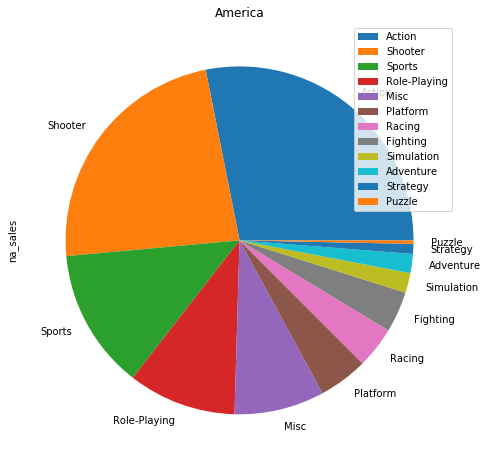

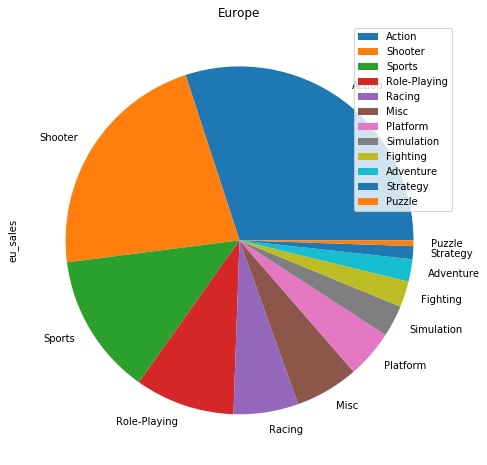

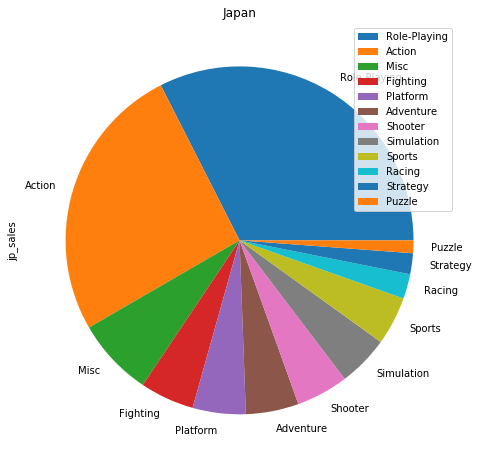

In [21]:
#Самые популярные жанры
na2 = period.pivot_table(index = "genre", values = "na_sales", aggfunc = "sum").sort_values(by = "na_sales", ascending = False)
print("Самые популярные жанры в северной Америке:")
print(na2.head())
na2.plot(y= "na_sales", kind = "pie", figsize= (10, 8), title = "America")
print()
eu2 = period.pivot_table(index = "genre", values = "eu_sales", aggfunc = "sum").sort_values(by = "eu_sales", ascending = False)
print("Самые популярные жанры в Европе:")
print(eu2.head())
eu2.plot(y = "eu_sales", kind = "pie", figsize= (10, 8), title = "Europe")
print()
jp2 = period.pivot_table(index = "genre", values = "jp_sales", aggfunc = "sum").sort_values(by = "jp_sales", ascending = False)
print("Самые популярные жанры в Японии:")
print(jp2.head())
jp2.plot(y = "jp_sales", kind = "pie", figsize= (10, 8), title = "Japan")

Опять в европе и в америке предпочтение в жанрах очень похоже, а вот в Японии в лидерах стоит совсем другой жанр. Но все же жанр экшен, даже в Японии находится в топах.

Самые популярные рэйтинги в северной Америке:
        na_sales
rating          
M         320.00
E         174.15
E10+      122.29
T         115.72
EC          0.42

Самые популярные рэйтинги в Европе:
        eu_sales
rating          
M         263.45
E         144.60
T          88.67
E10+       82.45
RP          0.03

Самые популярные рэйтинги в Японии:
        jp_sales
rating          
T          39.13
E          37.62
M          27.84
E10+       11.61
EC          0.00


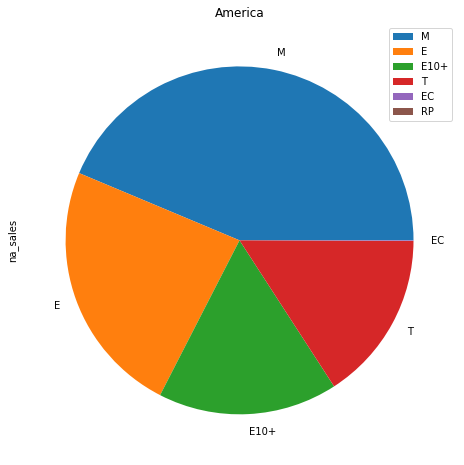

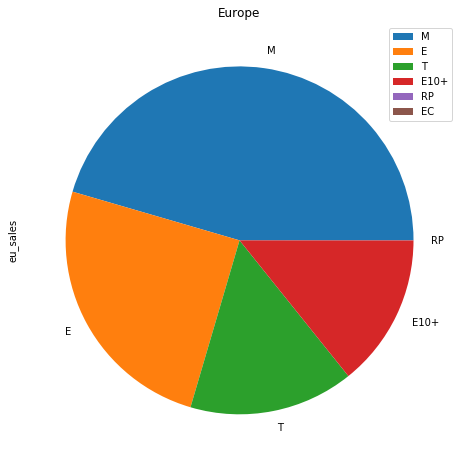

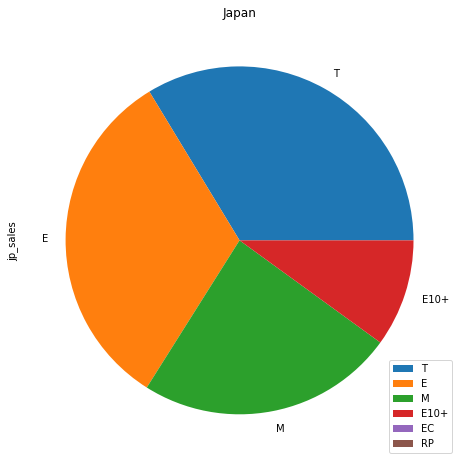

In [22]:
#Влияет ли рейтинг ESRB на продажи в отдельном регионе
na3 = period.pivot_table(index = "rating", values = "na_sales", aggfunc = "sum").sort_values(by = "na_sales", ascending = False)
print("Самые популярные рэйтинги в северной Америке:")
print(na3.head())
na3.plot(y= "na_sales", kind = "pie", figsize= (10, 8), title = "America")
print()
eu3 = period.pivot_table(index = "rating", values = "eu_sales", aggfunc = "sum").sort_values(by = "eu_sales", ascending = False)
print("Самые популярные рэйтинги в Европе:")
print(eu3.head())
eu3.plot(y = "eu_sales", kind = "pie", figsize= (10, 8), title = "Europe")
print()
jp3 = period.pivot_table(index = "rating", values = "jp_sales", aggfunc = "sum").sort_values(by = "jp_sales", ascending = False)
print("Самые популярные рэйтинги в Японии:")
print(jp3.head())
jp3.plot(y = "jp_sales", kind = "pie", figsize= (10, 8), title = "Japan")

Можно увидеть, что рэйтинг M это самый поппулярный в Европе и в Америке. В Японии М тоже популярен, но он позади таких рейтингов как Т и Е. А топ самых не популярных рейтингов это ЕС, RP и Е10+.

<a id= 'five'></a>
# Шаг 5

# Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Нулевая гипотеза: Рейтинги платформ Xbox One и PC не одинаковые
- Единичиная гипотеза: Рейтинги платформ Xbox One и PC одинаковые

In [23]:
gdata.dropna(subset = ["user_score"], inplace = True)
xone = gdata.query('platform == "XOne"')
xone_scr = xone["user_score"]
pc = gdata.query('platform == "PC"')
pc_scr = pc["user_score"]

In [24]:
alpha = .05
results = st.ttest_ind(xone_scr, pc_scr)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548407e-05
Отвергаем нулевую гипотезу


# Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.
- Нулевая гипотеза: Рейтинги жанров Action и Sports одинаковые
- Единичиная гипотеза: Рейтинги жанров Action и Sports разные

In [25]:
action = gdata.query('genre == "Action"')
action_gen = gdata["user_score"]
sports = gdata.query('genre == "Sports"')
sports_gen = gdata["user_score"]

In [26]:
alpha = .05
results = st.ttest_ind(action_gen, sports_gen)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


Нулевую и единичную гипотезу я назначал по принципу того, что нулевая гипотеза отвергала мою основную гипотезу, а единичная наоборот. 
Что бы проверить гипотезы, я делал срез данных и получал два массива данных которые мне надо было сравнить и понять удовлетворяют моей гипотезе или нет. Метод, который я решил использовать для проверки это распределение стюдента, так как это самый простой и наглядный способ проверки.

<a id= 'six'></a>
# Шаг 6

# Общий вывод 

В итоге было сделанно много работы по восстановлению информации и заполнению пропусков. Так же был выполнен анализ игр, жанров и платформ в разных регионах и в разных промежутков времени.
Из иследования были сделаны следующие выводы, рынок производства игр находится в упадке. Новые платформы приносят компаниям меньше, чем предыдущие поколения. Пологаю, что рынок достиг дна и скоро появятся какие то новые поколения консоли которые вернут актиный рост этой индустрие как и в былые времена. Так же, было выевлено, что предпочтение на консоли разные, но в Европе и в Америке предпочтения похожи. Одно из немногого, что остается примерно одинаковое по популярности независимости от регионов это рейтинг по возрасту и жанр. Другими словами, что бы создать максимально комерчески успешную игру нужно, что бы она была в жанре экшн и с рейтингом Е, а так же надо выпустить на консоли PS4. Я выбрал PS4, так как успешные платформа прошлого уже совсем не популярные к 2016 году. Единственная свежая консоль с неплохой общей выручкой, оказалась PS4.

Под конец исследования, было выявлено, что предпочтения по жанрам, платформам и рейтингам отличаются зависимости от региона. В Европе и в Америке доминируют игры экшн с рэйтингом М, на консолях таких как PS3 и PS4. А в Японии, предпочитают игры в жанре role-playing с рейтингом Т, на консолях 3DS.
Так же, было выявленно, что жизненый цикл любой консоли состовляет примерно 10 лет, и самая перспективная платформа для игр которая, не изживет себя еще пару лет является PS4.